## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

     |████████████████████████████████| 163kB 2.7MB/s 


In [0]:
# Bibliotecas a serem utilizadas
import random
import numpy
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Variáveis de Decisão
3.   Operadores



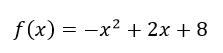

In [0]:
# Função Objetivo
def objective_function(individual):
    return (-individual[0]**2 + 2*individual[0] + 8),

In [0]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo); peso positivo = maximização
creator.create("Individual", list,  fitness=creator.FitnessMax)   # indivíduo

URL com todas as informações sobre a biblioteca: 

https://deap.readthedocs.io/en/master/api/tools.html

In [0]:
toolbox = base.Toolbox()

# Gerador de atributos inteiros: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_int", random.uniform, -10, 10)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, 1)   # 1: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [0]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.register("mate", tools.cxSimulatedBinaryBounded)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selRoulette)

In [0]:
pop = toolbox.population(n=50)                            # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

## Otimização

In [8]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0, mutpb=0.1, ngen=20, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	std   	min     	max    
0  	50    	-30.4383	32.928	-105.921	8.99994
1  	7     	8.99994 	0     	8.99994 	8.99994
2  	5     	8.97392 	0.18208	7.69936 	8.99994
3  	1     	8.97392 	0.18208	7.69936 	8.99994
4  	7     	8.99865 	0.00902458	8.93548 	8.99994
5  	5     	8.99865 	0.00902458	8.93548 	8.99994
6  	5     	8.99865 	0.00902458	8.93548 	8.99994
7  	3     	8.9859  	0.0894972 	8.36261 	8.99994
8  	7     	8.98461 	0.0897497 	8.36261 	8.99994
9  	3     	8.98332 	0.089983  	8.36261 	8.99994
10 	7     	8.99736 	0.0126318 	8.93548 	8.99994
11 	4     	8.99729 	0.0126272 	8.93548 	8.99994
12 	4     	8.99986 	0.000507889	8.99631 	8.99994
13 	10    	8.99965 	0.000984191	8.99631 	8.99994
14 	1     	8.99957 	0.00108833 	8.99631 	8.99994
15 	5     	8.86509 	0.942369   	2.26851 	8.99994
16 	4     	8.99986 	0.000507889	8.99631 	8.99994
17 	3     	8.99994 	0          	8.99994 	8.99994
18 	8     	8.95432 	0.31928    	6.71936 	8.99994
19 	6     	8.99994 	0          	8.99994 	8.99994
20

## Resultados

In [9]:
# 5 melhores soluções da última geração
import pandas as pd
pd.DataFrame(pop).head(5)

,0
0,1.007981
1,1.007981
2,1.007981
3,1.007981
4,1.007981


In [10]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof)

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[[1.0079814086548033]]
Melhor Resultado da Função Objetivo:


(8.999936297115886,)

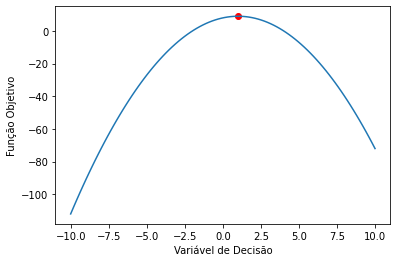

In [11]:
# Vamos dar uma olhada na função
import matplotlib.pyplot as plt
x = numpy.linspace(-10,10,100) # 100 pontos entre -10 e 10
y=numpy.empty(len(x))
for i in range(len(x)):
  y[i] = objective_function([x[i]])[0]
plt.plot(x,y); # Variável de Decisão vs. Função Objetivo
plt.scatter(hof,objective_function(hof[0]), c='red');
plt.xlabel('Variável de Decisão');
plt.ylabel('Função Objetivo');